In [1]:
################################################
##
## Object Detection
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import os
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report


#######################################################

from fastai.vision.all import *


#######################################################

N_EPOCHS = 10000          ## 4000
batch_size = 10   ## 5    ## 32
learning_rate =  0.1    ## 0.01   ## 1e-5 


#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

#######################################################

In [2]:
path = Path('Section2')

In [3]:
fns = get_image_files(path)
fns

(#20) [Path('Section2/gher/dae-92006686.jpg'),Path('Section2/gher/ger-22590020.jpg'),Path('Section2/gher/H684bce1896314012b5d4b3b5042b84a2p.jpg'),Path('Section2/gher/IMG_9186-L.jpg'),Path('Section2/gher/Mongolia-Ger-5-1024x768.jpg'),Path('Section2/gher/traditional-ger-tent-home-of-mongolian-nomads-on-the-grass-plains-C53PKR.jpg'),Path('Section2/gher/traditional-house-in-steppe-near-ogii-lake-arkhangai-province-mongolia-EG1W4T.jpg'),Path('Section2/gher/traditional-mongolian-house.jpg'),Path('Section2/gher/yourte-tuvhun-1024x683.jpg'),Path('Section2/gher/yurt-1798218_1280.jpg')...]

In [4]:
images = DataBlock(
     blocks = (ImageBlock, CategoryBlock),
     get_items = get_image_files,
     splitter = RandomSplitter(valid_pct=0.2, seed=42),
     get_y = parent_label,
     item_tfms = Resize(128)  
)

In [5]:
dls = images.dataloaders(path)

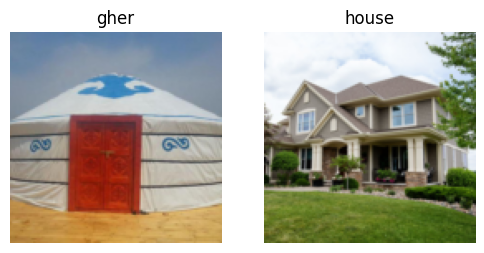

In [6]:
dls.valid.show_batch(max_n=2, nrows=1)

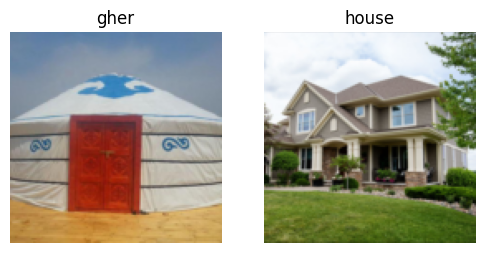

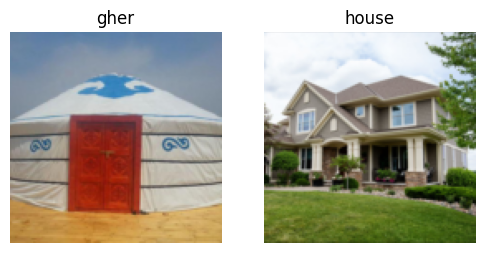

In [7]:
images = images.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = images.dataloaders(path)
dls.valid.show_batch(max_n=2, nrows=1)

images = images.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = images.dataloaders(path)
dls.valid.show_batch(max_n=2, nrows=1)

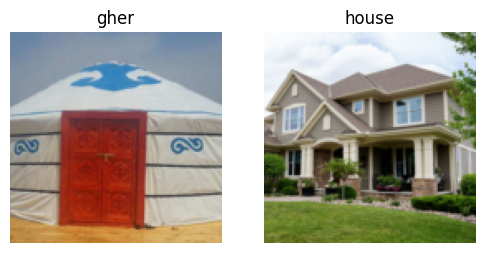

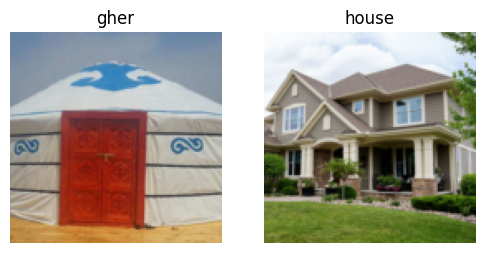

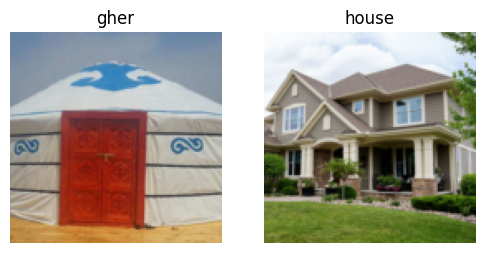

In [8]:
images = images.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = images.dataloaders(path)
dls.valid.show_batch(max_n=2, nrows=1)


images = images.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = images.dataloaders(path)
dls.valid.show_batch(max_n=2, nrows=1)



images = images.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = images.dataloaders(path)
dls.valid.show_batch(max_n=2, nrows=1)

In [9]:
## now fine tune cnn_learner with my data

images = images.new(
     item_tfms=RandomResizedCrop(224, min_scale=0.5),
     batch_tfms=aug_transforms()
)

dls = images.dataloaders(  path  )

learn = cnn_learner(dls, resnet18, metrics=error_rate) 

learn.fine_tune(4)


C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warn

epoch,train_loss,valid_loss,error_rate,time
0,nan,1.530872,0.250000,00:00


C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,1.530872,0.250000,00:00
1,nan,1.530872,0.250000,00:00
2,nan,1.530872,0.250000,00:00
3,nan,1.530872,0.250000,00:00


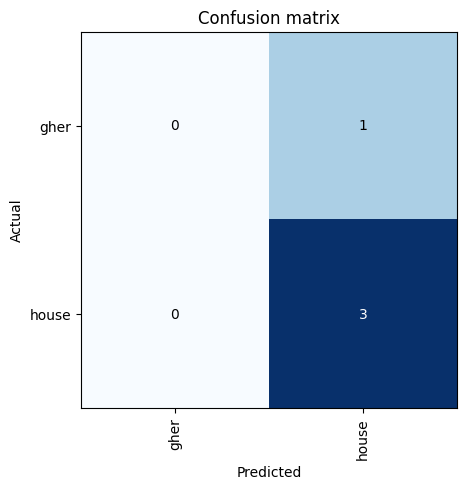

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()


In [24]:
learn.dls.vocab

['gher', 'house']

In [12]:
learn.export()

In [14]:
learn_inf = load_learner('export.pkl')

In [15]:
learn_inf = load_learner('export.pkl')

In [16]:
img = 'section1/car/Ford-Escape-1.jpg'


is_car, _, probs = learn.predict(img)
print(is_car)
print(probs)


is_car, _, probs = learn_inf.predict(img)
print(is_car)
print(probs)

house
TensorBase([    0.0000,     1.0000])


house
TensorBase([    0.0000,     1.0000])


In [20]:
learn_inf.dls.vocab

['gher', 'house']

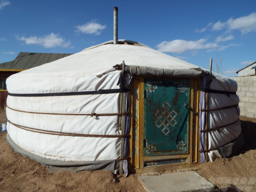

In [22]:
im = Image.open('section2/gher/Mongolia-Ger-5-1024x768.jpg')
im.thumbnail((256,256))
im

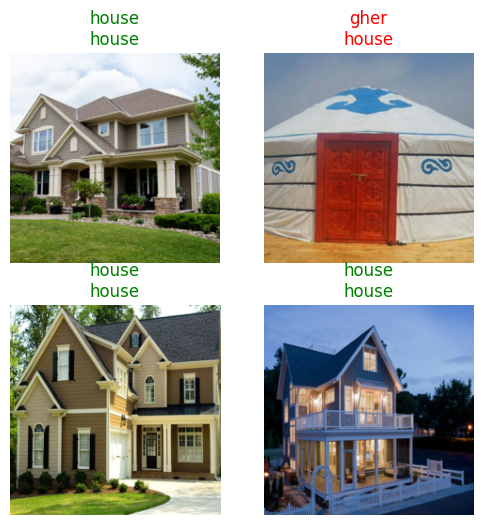

In [23]:
learn.show_results()